In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures

from itertools import combinations
import warnings
warnings.filterwarnings('ignore')

The data used in this project is from an anonymous organisation’s social media ad campaign. The data file can be downloaded from here. The file conversion_data.csv contains 1143 observations in 11 variables. Below are the descriptions of the variables.

1.) ad_id: an unique ID for each ad.

2.) xyz_campaign_id: an ID associated with each ad campaign of XYZ company.

3.) fb_campaign_id: an ID associated with how Facebook tracks each campaign.

4.) age: age of the person to whom the ad is shown.

5.) gender: gender of the person to whim the add is shown

6.) interest: a code specifying the category to which the person’s interest belongs (interests are as mentioned in the person’s Facebook public profile).

7.) Impressions: the number of times the ad was shown.

8.) Clicks: number of clicks on for that ad.

9.) Spent: Amount paid by company xyz to Facebook, to show that ad.

10.) Total conversion: Total number of people who enquired about the product after seeing the ad.

11.) Approved conversion: Total number of people who bought the product after seeing the ad.

# Data Cleaning

In [26]:
df = pd.read_csv('KAG_conversion_data.csv')
df

ad_id  xyz_campaign_id  fb_campaign_id    age gender  interest  \
0      708746              916          103916  30-34      M        15   
1      708749              916          103917  30-34      M        16   
2      708771              916          103920  30-34      M        20   
3      708815              916          103928  30-34      M        28   
4      708818              916          103928  30-34      M        28   
5      708820              916          103929  30-34      M        29   
6      708889              916          103940  30-34      M        15   
7      708895              916          103941  30-34      M        16   
8      708953              916          103951  30-34      M        27   
9      708958              916          103952  30-34      M        28   
10     708979              916          103955  30-34      M        31   
11     709023              916          103962  30-34      M         7   
12     709038              916          103965  30-34      M        16   
13     709040              916          103965  30-34      M        16   
14     709059              916          103968  30-34      M        20   
15     709105              916          103976  30-34      M        28   
16     709115              916          103978  30-34      M        30   
17     709124              916          103979  30-34      M        31   
18     709179              916          103988  35-39      M        15   
19     709183              916          103989  35-39      M        16   
20     709320              916          104012  35-39      M        15   
21     709323              916          104012  35-39      M        15   
22     709326              916          104013  35-39      M        16   
23     709327              916          104013  35-39      M        16   
24     709328              916          104013  35-39      M        16   
25     709455              916          104034  35-39      M         7   
26     709544              916          104049  35-39      M        29   
27     709614              916          104061  40-44      M        16   
28     709756              916          104085  40-44      M        16   
29     709761              916          104085  40-44      M        16   
...       ...              ...             ...    ...    ...       ...   
1113  1314384             1178          179951  35-39      F       113   
1114  1314385             1178          179952  35-39      F       114   
1115  1314386             1178          179953  40-44      F       100   
1116  1314387             1178          179954  40-44      F       101   
1117  1314388             1178          179955  40-44      F       102   
1118  1314389             1178          179956  40-44      F       103   
1119  1314390             1178          179957  40-44      F       104   
1120  1314391             1178          179958  40-44      F       105   
1121  1314392             1178          179959  40-44      F       106   
1122  1314393             1178          179960  40-44      F       107   
1123  1314394             1178          179961  40-44      F       108   
1124  1314395             1178          179962  40-44      F       109   
1125  1314396             1178          179963  40-44      F       110   
1126  1314397             1178          179964  40-44      F       111   
1127  1314398             1178          179965  40-44      F       112   
1128  1314400             1178          179967  40-44      F       114   
1129  1314401             1178          179968  45-49      F       100   
1130  1314402             1178          179969  45-49      F       101   
1131  1314403             1178          179970  45-49      F       102   
1132  1314404             1178          179971  45-49      F       103   
1133  1314405             1178          179972  45-49      F       104   
1134  1314406             1178          179973  45-49      F       105   
1135  131440

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
ad_id                  1143 non-null int64
xyz_campaign_id        1143 non-null int64
fb_campaign_id         1143 non-null int64
age                    1143 non-null object
gender                 1143 non-null object
interest               1143 non-null int64
Impressions            1143 non-null int64
Clicks                 1143 non-null int64
Spent                  1143 non-null float64
Total_Conversion       1143 non-null int64
Approved_Conversion    1143 non-null int64
dtypes: float64(1), int64(8), object(2)
memory usage: 98.3+ KB


In [4]:
df.ad_id.nunique()

# total of 1,143 total ads were shown

1143

In [5]:
df.xyz_campaign_id.nunique()

# ads from 3 marketing campaigns

3

In [6]:
df.fb_campaign_id.nunique()

# 691 facebook identified campaigns

691

In [7]:
df.interest.nunique()

# viewers of ads come from 40 different interest groups

40

In [8]:
df.describe()

ad_id  xyz_campaign_id  fb_campaign_id     interest  \
count  1.143000e+03      1143.000000     1143.000000  1143.000000   
mean   9.872611e+05      1067.382327   133783.989501    32.766404   
std    1.939928e+05       121.629393    20500.308622    26.952131   
min    7.087460e+05       916.000000   103916.000000     2.000000   
25%    7.776325e+05       936.000000   115716.000000    16.000000   
50%    1.121185e+06      1178.000000   144549.000000    25.000000   
75%    1.121804e+06      1178.000000   144657.500000    31.000000   
max    1.314415e+06      1178.000000   179982.000000   114.000000   

        Impressions       Clicks        Spent  Total_Conversion  \
count  1.143000e+03  1143.000000  1143.000000       1143.000000   
mean   1.867321e+05    33.390201    51.360656          2.855643   
std    3.127622e+05    56.892438    86.908418          4.483593   
min    8.700000e+01     0.000000     0.000000          0.000000   
25%    6.503500e+03     1.000000     1.480000          1.000000   
50%    5.150900e+04     8.000000    12.370000          1.000000   
75%    2.217690e+05    37.500000    60.025000          3.000000   
max    3.052003e+06   421.000000   639.949998         60.000000   

       Approved_Conversion  
count          1143.000000  
mean              0.944007  
std               1.737708  
min               0.000000  
25%               0.000000  
50%               1.000000  
75%               1.000000  
max              21.000000

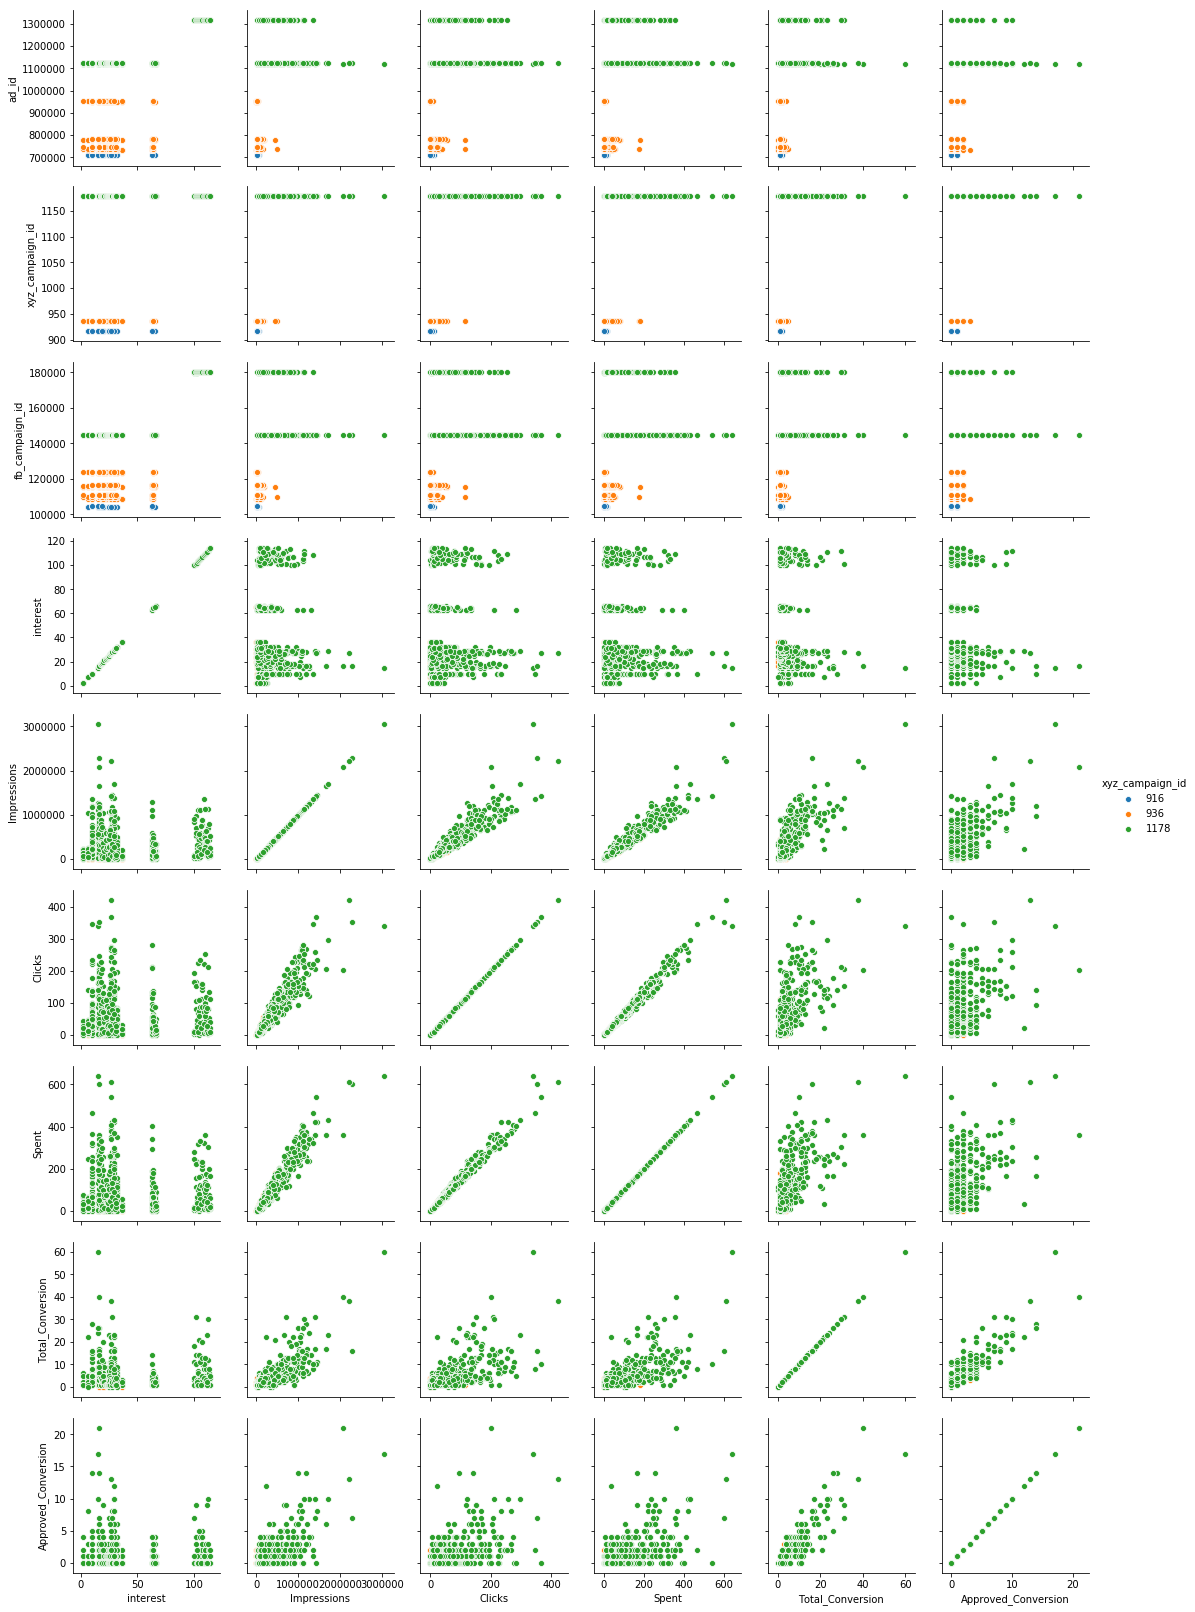

In [9]:
sns.pairplot(data=df,
    y_vars=['ad_id','xyz_campaign_id','fb_campaign_id','interest', 'Impressions', 'Clicks', 'Spent', 'Total_Conversion', 'Approved_Conversion'],
    x_vars=['interest', 'Impressions', 'Clicks', 'Spent', 'Total_Conversion', 'Approved_Conversion'] , hue='xyz_campaign_id')
                

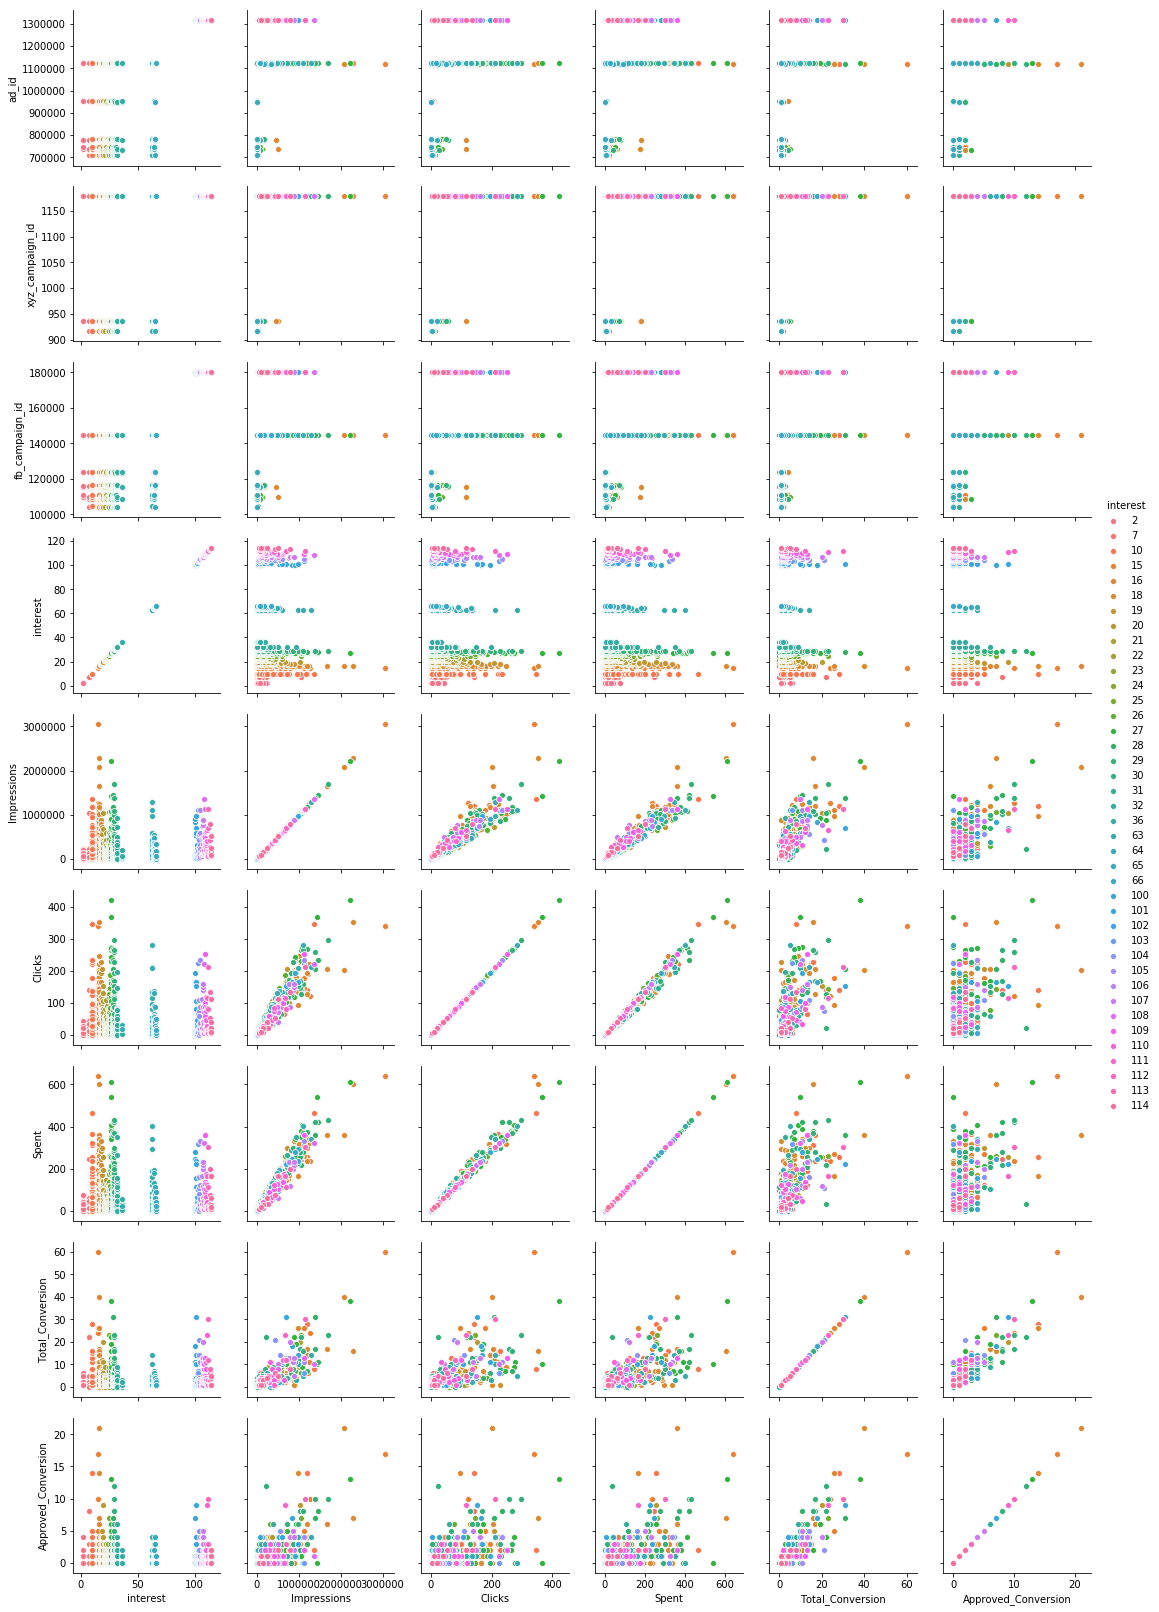

In [10]:
sns.pairplot(data=df,
    y_vars=['ad_id','xyz_campaign_id','fb_campaign_id','interest', 'Impressions', 'Clicks', 'Spent', 'Total_Conversion', 'Approved_Conversion'],
    x_vars=['interest', 'Impressions', 'Clicks', 'Spent', 'Total_Conversion', 'Approved_Conversion'] , hue='interest')

In [28]:
# create new variable to determine is conversion was successful or not as binary

df['success'] = [1 if x >= 1 else 0 for x in df['Approved_Conversion']]
df

ad_id  xyz_campaign_id  fb_campaign_id    age gender  interest  \
0      708746              916          103916  30-34      M        15   
1      708749              916          103917  30-34      M        16   
2      708771              916          103920  30-34      M        20   
3      708815              916          103928  30-34      M        28   
4      708818              916          103928  30-34      M        28   
5      708820              916          103929  30-34      M        29   
6      708889              916          103940  30-34      M        15   
7      708895              916          103941  30-34      M        16   
8      708953              916          103951  30-34      M        27   
9      708958              916          103952  30-34      M        28   
10     708979              916          103955  30-34      M        31   
11     709023              916          103962  30-34      M         7   
12     709038              916          103965  30-34      M        16   
13     709040              916          103965  30-34      M        16   
14     709059              916          103968  30-34      M        20   
15     709105              916          103976  30-34      M        28   
16     709115              916          103978  30-34      M        30   
17     709124              916          103979  30-34      M        31   
18     709179              916          103988  35-39      M        15   
19     709183              916          103989  35-39      M        16   
20     709320              916          104012  35-39      M        15   
21     709323              916          104012  35-39      M        15   
22     709326              916          104013  35-39      M        16   
23     709327              916          104013  35-39      M        16   
24     709328              916          104013  35-39      M        16   
25     709455              916          104034  35-39      M         7   
26     709544              916          104049  35-39      M        29   
27     709614              916          104061  40-44      M        16   
28     709756              916          104085  40-44      M        16   
29     709761              916          104085  40-44      M        16   
...       ...              ...             ...    ...    ...       ...   
1113  1314384             1178          179951  35-39      F       113   
1114  1314385             1178          179952  35-39      F       114   
1115  1314386             1178          179953  40-44      F       100   
1116  1314387             1178          179954  40-44      F       101   
1117  1314388             1178          179955  40-44      F       102   
1118  1314389             1178          179956  40-44      F       103   
1119  1314390             1178          179957  40-44      F       104   
1120  1314391             1178          179958  40-44      F       105   
1121  1314392             1178          179959  40-44      F       106   
1122  1314393             1178          179960  40-44      F       107   
1123  1314394             1178          179961  40-44      F       108   
1124  1314395             1178          179962  40-44      F       109   
1125  1314396             1178          179963  40-44      F       110   
1126  1314397             1178          179964  40-44      F       111   
1127  1314398             1178          179965  40-44      F       112   
1128  1314400             1178          179967  40-44      F       114   
1129  1314401             1178          179968  45-49      F       100   
1130  1314402             1178          179969  45-49      F       101   
1131  1314403             1178          179970  45-49      F       102   
1132  1314404             1178          179971  45-49      F       103   
1133  1314405             1178          179972  45-49      F       104   
1134  1314406             1178          179973  45-49      F       105   
1135  131440

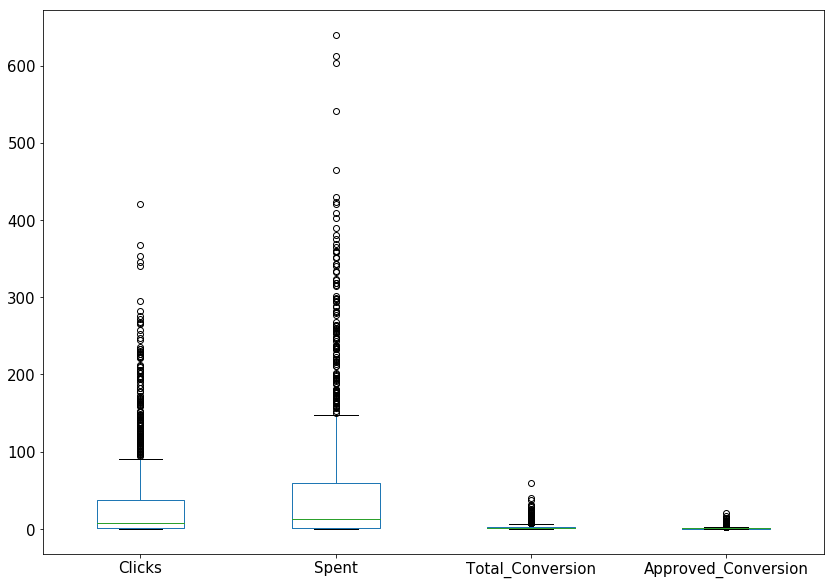

In [29]:
# examine outliers

df.iloc[:,7:-1].boxplot(grid=False, fontsize=15, figsize=(14,10))

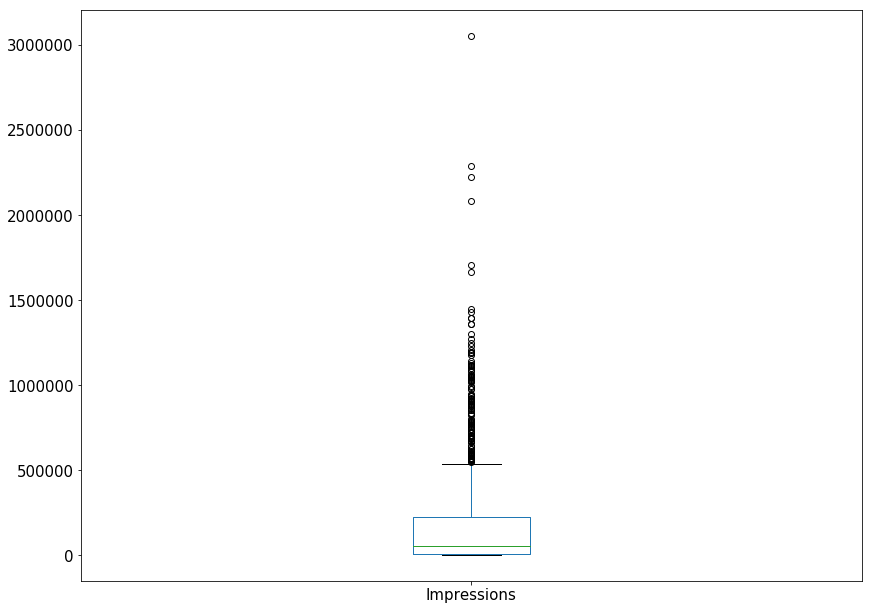

In [30]:
# examine outliers

df.iloc[:,6:7].boxplot(grid=False, fontsize=15, figsize=(14,10.5))

In [31]:
# getting rid of the outliers for impressions and spent
# cut off at >2,000,000 impressions and >500 spent

df.drop(df.loc[df['Impressions']>2000000].index, inplace=True)
df.drop(df.loc[df['Spent']>500].index, inplace=True)
df

# appears we dropped 5 rows from the dataset

ad_id  xyz_campaign_id  fb_campaign_id    age gender  interest  \
0      708746              916          103916  30-34      M        15   
1      708749              916          103917  30-34      M        16   
2      708771              916          103920  30-34      M        20   
3      708815              916          103928  30-34      M        28   
4      708818              916          103928  30-34      M        28   
5      708820              916          103929  30-34      M        29   
6      708889              916          103940  30-34      M        15   
7      708895              916          103941  30-34      M        16   
8      708953              916          103951  30-34      M        27   
9      708958              916          103952  30-34      M        28   
10     708979              916          103955  30-34      M        31   
11     709023              916          103962  30-34      M         7   
12     709038              916          103965  30-34      M        16   
13     709040              916          103965  30-34      M        16   
14     709059              916          103968  30-34      M        20   
15     709105              916          103976  30-34      M        28   
16     709115              916          103978  30-34      M        30   
17     709124              916          103979  30-34      M        31   
18     709179              916          103988  35-39      M        15   
19     709183              916          103989  35-39      M        16   
20     709320              916          104012  35-39      M        15   
21     709323              916          104012  35-39      M        15   
22     709326              916          104013  35-39      M        16   
23     709327              916          104013  35-39      M        16   
24     709328              916          104013  35-39      M        16   
25     709455              916          104034  35-39      M         7   
26     709544              916          104049  35-39      M        29   
27     709614              916          104061  40-44      M        16   
28     709756              916          104085  40-44      M        16   
29     709761              916          104085  40-44      M        16   
...       ...              ...             ...    ...    ...       ...   
1113  1314384             1178          179951  35-39      F       113   
1114  1314385             1178          179952  35-39      F       114   
1115  1314386             1178          179953  40-44      F       100   
1116  1314387             1178          179954  40-44      F       101   
1117  1314388             1178          179955  40-44      F       102   
1118  1314389             1178          179956  40-44      F       103   
1119  1314390             1178          179957  40-44      F       104   
1120  1314391             1178          179958  40-44      F       105   
1121  1314392             1178          179959  40-44      F       106   
1122  1314393             1178          179960  40-44      F       107   
1123  1314394             1178          179961  40-44      F       108   
1124  1314395             1178          179962  40-44      F       109   
1125  1314396             1178          179963  40-44      F       110   
1126  1314397             1178          179964  40-44      F       111   
1127  1314398             1178          179965  40-44      F       112   
1128  1314400             1178          179967  40-44      F       114   
1129  1314401             1178          179968  45-49      F       100   
1130  1314402             1178          179969  45-49      F       101   
1131  1314403             1178          179970  45-49      F       102   
1132  1314404             1178          179971  45-49      F       103   
1133  1314405             1178          179972  45-49      F       104   
1134  1314406             1178          179973  45-49      F       105   
1135  131440

# EDA

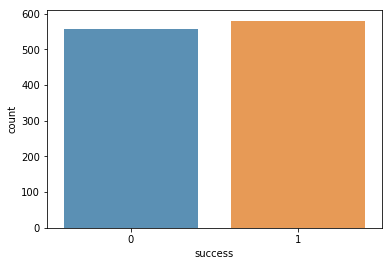

In [32]:
# does not present class imbalance here

sns.countplot(df['success'], alpha =.80)

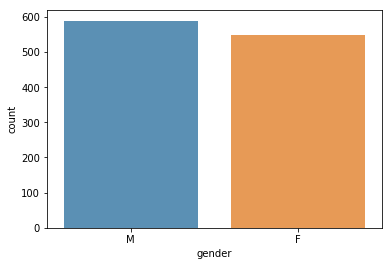

In [33]:
# nor here, similar counts of Males and Females

sns.countplot(df['gender'], alpha =.80)

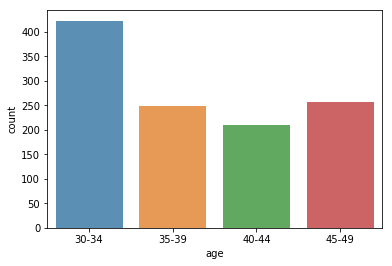

In [34]:
sns.countplot(df['age'], alpha =.80)

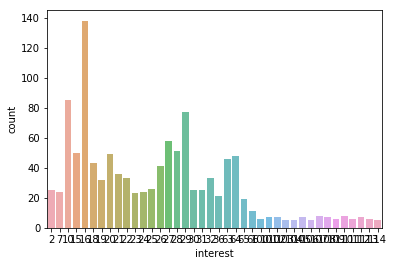

In [35]:
sns.countplot(df['interest'], alpha =.80)

In [36]:
# Which gender had more success in conversion?

df_gender = df.set_index(['gender', 'success'])
df_gender

ad_id  xyz_campaign_id  fb_campaign_id    age  interest  \
gender success                                                              
M      1         708746              916          103916  30-34        15   
       0         708749              916          103917  30-34        16   
       0         708771              916          103920  30-34        20   
       0         708815              916          103928  30-34        28   
       1         708818              916          103928  30-34        28   
       1         708820              916          103929  30-34        29   
       0         708889              916          103940  30-34        15   
       1         708895              916          103941  30-34        16   
       0         708953              916          103951  30-34        27   
       0         708958              916          103952  30-34        28   
       0         708979              916          103955  30-34        31   
       0         709023              916          103962  30-34         7   
       0         709038              916          103965  30-34        16   
       0         709040              916          103965  30-34        16   
       1         709059              916          103968  30-34        20   
       1         709105              916          103976  30-34        28   
       0         709115              916          103978  30-34        30   
       1         709124              916          103979  30-34        31   
       0         709179              916          103988  35-39        15   
       1         709183              916          103989  35-39        16   
       1         709320              916          104012  35-39        15   
       0         709323              916          104012  35-39        15   
       0         709326              916          104013  35-39        16   
       1         709327              916          104013  35-39        16   
       1         709328              916          104013  35-39        16   
       0         709455              916          104034  35-39         7   
       1         709544              916          104049  35-39        29   
       0         709614              916          104061  40-44        16   
       1         709756              916          104085  40-44        16   
       0         709761              916          104085  40-44        16   
...                 ...              ...             ...    ...       ...   
F      1        1314384             1178          179951  35-39       113   
       1        1314385             1178          179952  35-39       114   
       1        1314386             1178          179953  40-44       100   
       1        1314387             1178          179954  40-44       101   
       0        1314388             1178          179955  40-44       102   
       0        1314389             1178          179956  40-44       103   
       0        1314390             1178          179957  40-44       104   
       0        1314391             1178          179958  40-44       105   
       1        1314392             1178          179959  40-44       106   
       1        1314393             1178          179960  40-44       107   
       1        1314394             1178          179961  40-44       108   
       1        1314395             1178          179962  40-44       109   
       1        1314396             1178          179963  40-44       110   
       0        1314397             1178          179964  40-44       111   
       1        1314398             1178          179965  40-44       112   
       1        1314400             1178          179967  40-44       114   
       1        1314401             1178          179968  45-49       100   
       1        1314402             1178          179969  45-49       101   
       1        1314403             1178          179970  45-49       102   
       0      

In [37]:
# Which age group had more success in conversion?

df_age = df.set_index(['age', 'success'])
df_age

ad_id  xyz_campaign_id  fb_campaign_id gender  interest  \
age   success                                                              
30-34 1         708746              916          103916      M        15   
      0         708749              916          103917      M        16   
      0         708771              916          103920      M        20   
      0         708815              916          103928      M        28   
      1         708818              916          103928      M        28   
      1         708820              916          103929      M        29   
      0         708889              916          103940      M        15   
      1         708895              916          103941      M        16   
      0         708953              916          103951      M        27   
      0         708958              916          103952      M        28   
      0         708979              916          103955      M        31   
      0         709023              916          103962      M         7   
      0         709038              916          103965      M        16   
      0         709040              916          103965      M        16   
      1         709059              916          103968      M        20   
      1         709105              916          103976      M        28   
      0         709115              916          103978      M        30   
      1         709124              916          103979      M        31   
35-39 0         709179              916          103988      M        15   
      1         709183              916          103989      M        16   
      1         709320              916          104012      M        15   
      0         709323              916          104012      M        15   
      0         709326              916          104013      M        16   
      1         709327              916          104013      M        16   
      1         709328              916          104013      M        16   
      0         709455              916          104034      M         7   
      1         709544              916          104049      M        29   
40-44 0         709614              916          104061      M        16   
      1         709756              916          104085      M        16   
      0         709761              916          104085      M        16   
...                ...              ...             ...    ...       ...   
35-39 1        1314384             1178          179951      F       113   
      1        1314385             1178          179952      F       114   
40-44 1        1314386             1178          179953      F       100   
      1        1314387             1178          179954      F       101   
      0        1314388             1178          179955      F       102   
      0        1314389             1178          179956      F       103   
      0        1314390             1178          179957      F       104   
      0        1314391             1178          179958      F       105   
      1        1314392             1178          179959      F       106   
      1        1314393             1178          179960      F       107   
      1        1314394             1178          179961      F       108   
      1        1314395             1178          179962      F       109   
      1        1314396             1178          179963      F       110   
      0        1314397             1178          179964      F       111   
      1        1314398             1178          179965      F       112   
      1        1314400             1178          179967      F       114   
45-49 1        1314401             1178          179968      F       100   
      1        1314402             1178          179969      F       101   
      1        1314403             1178          179970      F       102   
      0        1314404             1178          179971      F   

In [38]:
# how many of each gender
df.groupby(['gender']).count()

ad_id  xyz_campaign_id  fb_campaign_id  age  interest  Impressions  \
gender                                                                       
F         549              549             549  549       549          549   
M         589              589             589  589       589          589   

        Clicks  Spent  Total_Conversion  Approved_Conversion  success  
gender                                                                 
F          549    549               549                  549      549  
M          589    589               589                  589      589

In [39]:
# how many of each age group
df.groupby(['age']).count()

ad_id  xyz_campaign_id  fb_campaign_id  gender  interest  Impressions  \
age                                                                            
30-34    423              423             423     423       423          423   
35-39    248              248             248     248       248          248   
40-44    210              210             210     210       210          210   
45-49    257              257             257     257       257          257   

       Clicks  Spent  Total_Conversion  Approved_Conversion  success  
age                                                                   
30-34     423    423               423                  423      423  
35-39     248    248               248                  248      248  
40-44     210    210               210                  210      210  
45-49     257    257               257                  257      257

In [53]:
# how many of each gender actually bought
bought_gender = df.groupby(['gender']).sum()['success']
bought_gender

gender
F    269
M    311
Name: success, dtype: int64

In [54]:
# how many of each age group actually bought
bought_age = df.groupby(['age']).sum()['success']
bought_age

age
30-34    223
35-39    129
40-44    107
45-49    121
Name: success, dtype: int64

In [42]:
# how many of each gender didnt buy
not_gender = df.groupby(['gender']).count()['success']-df.groupby(['gender']).sum()['success']


In [43]:
# how many of each age group didnt buy
not_age = df.groupby(['age']).count()['success']-df.groupby(['age']).sum()['success']


In [44]:
print(bought_gender)
print(not_gender)
print(bought_age)
print(not_age)

gender
F    269
M    311
Name: success, dtype: int64
gender
F    280
M    278
Name: success, dtype: int64
age
30-34    223
35-39    129
40-44    107
45-49    121
Name: success, dtype: int64
age
30-34    200
35-39    119
40-44    103
45-49    136
Name: success, dtype: int64


In [45]:
success_gender = pd.concat([bought_gender, not_gender], axis=1, sort=False)
success_gender.columns = ['Bought', "Didn't Buy"]
success_gender

Bought  Didn't Buy
gender                    
F          269         280
M          311         278

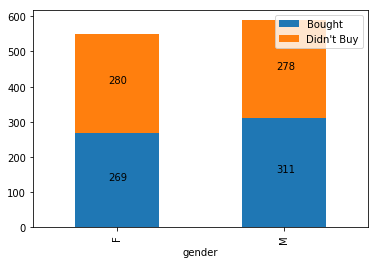

In [46]:
ax = success_gender.plot(kind='bar', stacked=True)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:0.0f}'.format(height), (p.get_x()+0.4*width, p.get_y()+0.5*height))
    

In [47]:
success_age = pd.concat([bought_age, not_age], axis=1, sort=False)
success_age.columns = ['Bought', "Didn't Buy"]
success_age

Bought  Didn't Buy
age                      
30-34     223         200
35-39     129         119
40-44     107         103
45-49     121         136

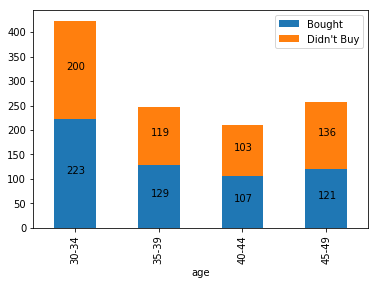

In [48]:
ax = success_age.plot(kind='bar', stacked=True)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:0.0f}'.format(height), (p.get_x()+0.3*width, p.get_y()+0.5*height))

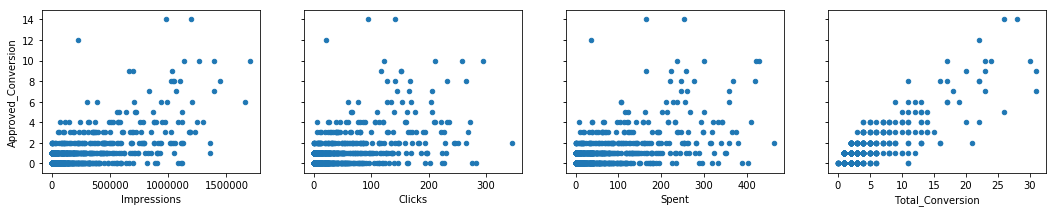

In [49]:
# visualize the relationship with Approved_Conversion using scatterplots
fig, axs = plt.subplots(1, 4, sharey=True, figsize=(18, 3))

for i, j in enumerate(['Impressions', 'Clicks', 'Spent', 'Total_Conversion']):
    df.plot(kind='scatter', x=j, y='Approved_Conversion', ax=axs[i])

plt.show()

In [50]:
# checking for correlation >0.75
correlation = abs(df.corr()) > 0.75
correlation

ad_id  xyz_campaign_id  fb_campaign_id  interest  \
ad_id                 True             True            True     False   
xyz_campaign_id       True             True            True     False   
fb_campaign_id        True             True            True     False   
interest             False            False           False      True   
Impressions          False            False           False     False   
Clicks               False            False           False     False   
Spent                False            False           False     False   
Total_Conversion     False            False           False     False   
Approved_Conversion  False            False           False     False   
success              False            False           False     False   

                     Impressions  Clicks  Spent  Total_Conversion  \
ad_id                      False   False  False             False   
xyz_campaign_id            False   False  False             False   
fb_campaign_id             False   False  False             False   
interest                   False   False  False             False   
Impressions                 True    True   True              True   
Clicks                      True    True   True             False   
Spent                       True    True   True             False   
Total_Conversion            True   False  False              True   
Approved_Conversion        False   False  False              True   
success                    False   False  False             False   

                     Approved_Conversion  success  
ad_id                              False    False  
xyz_campaign_id                    False    False  
fb_campaign_id                     False    False  
interest                           False    False  
Impressions                        False    False  
Clicks                             False    False  
Spent                              False    False  
Total_Conversion                    True    False  
Approved_Conversion                 True    False  
success                            False     True

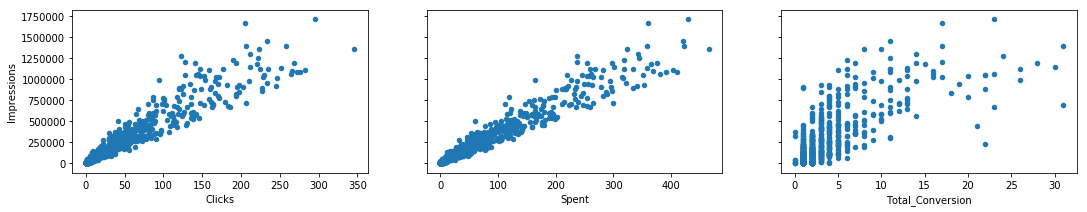

In [51]:
# visualize the relationship with of variables with high correlations
fig, axs = plt.subplots(1, 3, sharey=True, figsize=(18, 3))

for i, j in enumerate(['Clicks', 'Spent', 'Total_Conversion']):
    df.plot(kind='scatter', x=j, y='Impressions', ax=axs[i])

plt.show()

# Making Dummy Variables

In [16]:
df.loc[df['xyz_campaign_id'] == 916, 'xyz_campaign_id'] = 'x'
df.loc[df['xyz_campaign_id'] == 936, 'xyz_campaign_id'] = 'y'
df.loc[df['xyz_campaign_id'] == 1178, 'xyz_campaign_id'] = 'z'
df.drop(columns=['ad_id', 'fb_campaign_id'], axis=1, inplace=True)

In [17]:
bins= [0,1,5,10,20,50,100]
labels = ['Amount_Purchased_0','Amount_Purchased_1-5','Amount_Purchased_5-10', 'Amount_Purchased_10-20', 'Amount_Purchased_20-50', 'Amount_Purchased_50-100']
df['Amount_Purchased'] = pd.cut(df['Approved_Conversion'], bins=bins, labels=labels, right=False)
df = df.drop(columns=['Approved_Conversion'])
df.head()

xyz_campaign_id    age gender  interest  Impressions  Clicks  Spent  \
0               x  30-34      M        15         7350       1   1.43   
1               x  30-34      M        16        17861       2   1.82   
2               x  30-34      M        20          693       0   0.00   
3               x  30-34      M        28         4259       1   1.25   
4               x  30-34      M        28         4133       1   1.29   

   Total_Conversion  success      Amount_Purchased  
0                 2        1  Amount_Purchased_1-5  
1                 2        0    Amount_Purchased_0  
2                 1        0    Amount_Purchased_0  
3                 1        0    Amount_Purchased_0  
4                 1        1  Amount_Purchased_1-5

In [18]:
bins= [0,1,5,10,20,50,100]
labels = ['Amount_Clicked_0','Amount_Clicked_1-5', 'Amount_Clicked_5-10', 'Amount_Clicked_10-20', 'Amount_Clicked_20-50', 'Amount_Clicked_50-100']
df['Amount_Clicked'] = pd.cut(df['Total_Conversion'], bins=bins, labels=labels, right=False)
df = df.drop(columns=['Total_Conversion'])
df.head()

xyz_campaign_id    age gender  interest  Impressions  Clicks  Spent  \
0               x  30-34      M        15         7350       1   1.43   
1               x  30-34      M        16        17861       2   1.82   
2               x  30-34      M        20          693       0   0.00   
3               x  30-34      M        28         4259       1   1.25   
4               x  30-34      M        28         4133       1   1.29   

   success      Amount_Purchased      Amount_Clicked  
0        1  Amount_Purchased_1-5  Amount_Clicked_1-5  
1        0    Amount_Purchased_0  Amount_Clicked_1-5  
2        0    Amount_Purchased_0  Amount_Clicked_1-5  
3        0    Amount_Purchased_0  Amount_Clicked_1-5  
4        1  Amount_Purchased_1-5  Amount_Clicked_1-5

In [19]:
df[['interest']].apply(lambda x: x.astype('category')).dtypes

interest    category
dtype: object

In [20]:
xyz_campaign_id = pd.get_dummies(df['xyz_campaign_id'], drop_first = True)
gender = pd.get_dummies(df['gender'], drop_first = True) 
interest = pd.get_dummies(df['interest'], drop_first = True)
age = pd.get_dummies(df['age'], drop_first = True)
Amount_Purchased = pd.get_dummies(df['Amount_Purchased'], drop_first = True)
Amount_Clicked = pd.get_dummies(df['Amount_Clicked'], drop_first = True)

df.drop(['Amount_Purchased','Amount_Clicked', 'xyz_campaign_id','gender', 'interest', 'age'], axis = 1, inplace = True)

df1 = pd.concat([df, xyz_campaign_id, gender, interest, age, Amount_Purchased, Amount_Clicked], axis = 1)
df1.columns

Index([            'Impressions',                  'Clicks',
                         'Spent',                 'success',
                             'y',                       'z',
                             'M',                         7,
                              10,                        15,
                              16,                        18,
                              19,                        20,
                              21,                        22,
                              23,                        24,
                              25,                        26,
                              27,                        28,
                              29,                        30,
                              31,                        32,
                              36,                        63,
                              64,                        65,
                              66,                       100,
                        

In [21]:
# save cleaned dataframe to local drive

df1.to_csv("Clean_Data.csv")
df1

Impressions  Clicks       Spent  success  y  z  M  7  10  15  \
0            7350       1    1.430000        1  0  0  1  0   0   1   
1           17861       2    1.820000        0  0  0  1  0   0   0   
2             693       0    0.000000        0  0  0  1  0   0   0   
3            4259       1    1.250000        0  0  0  1  0   0   0   
4            4133       1    1.290000        1  0  0  1  0   0   0   
5            1915       0    0.000000        1  0  0  1  0   0   0   
6           15615       3    4.770000        0  0  0  1  0   0   1   
7           10951       1    1.270000        1  0  0  1  0   0   0   
8            2355       1    1.500000        0  0  0  1  0   0   0   
9            9502       3    3.160000        0  0  0  1  0   0   0   
10           1224       0    0.000000        0  0  0  1  0   0   0   
11            735       0    0.000000        0  0  0  1  1   0   0   
12           5117       0    0.000000        0  0  0  1  0   0   0   
13           5120       0    0.000000        0  0  0  1  0   0   0   
14          14669       7   10.280000        1  0  0  1  0   0   0   
15           1241       0    0.000000        1  0  0  1  0   0   0   
16           2305       1    0.570000        0  0  0  1  0   0   0   
17           1024       0    0.000000        1  0  0  1  0   0   0   
18           4627       1    1.690000        0  0  0  1  0   0   1   
19          21026       4    4.630000        1  0  0  1  0   0   0   
20           1422       0    0.000000        1  0  0  1  0   0   1   
21           7132       2    2.610000        0  0  0  1  0   0   1   
22          12190       2    3.050000        0  0  0  1  0   0   0   
23          12193       2    3.060000        1  0  0  1  0   0   0   
24           3332       0    0.000000        1  0  0  1  0   0   0   
25            559       0    0.000000        0  0  0  1  1   0   0   
26           7440       2    2.980000        1  0  0  1  0   0   0   
27          19113       4    5.520000        0  0  0  1  0   0   0   
28          10976       2    1.690000        1  0  0  1  0   0   0   
29           2861       0    0.000000        0  0  0  1  0   0   0   
...           ...     ...         ...      ... .. .. .. ..  ..  ..   
1113       441192      53   77.600000        1  0  1  0  0   0   0   
1114        90470      11   16.730000        1  0  1  0  0   0   0   
1115       834243     166  246.749998        1  0  1  0  0   0   0   
1116       696612     152  223.189995        1  0  1  0  0   0   0   
1117       329333      48   67.609999        0  0  1  0  0   0   0   
1118      1114711     224  319.000002        0  0  1  0  0   0   0   
1119       267316      58   82.929999        0  0  1  0  0   0   0   
1120       228629      38   57.000000        0  0  1  0  0   0   0   
1121       758340     159  233.110002        1  0  1  0  0   0   0   
1122       877535     149  217.779997        1  0  1  0  0   0   0   
1123      1357386     223  323.060007        1  0  1  0  0   0   0   
1124       280240      61   87.990002        1  0  1  0  0   0   0   
1125       419922      75  105.450001        1  0  1  0  0   0   0   
1126       402975      83  120.899998        0  0  1  0  0   0   0   
1127      1137635     211  301.049999        1  0  1  0  0   0   0   
1128       250234      40   62.319999        1  0  1  0  0   0   0   
1129       904907     195  279.219995        1  0  1  0  0   0   0   
1130       589270     107  158.050002        1  0  1  0  0   0   0   
1131       168714      24   36.010001        1  0  1  0  0   0   0   
1132        71982      11   16.340001        0  0  1  0  0   0   0   
1133       558666     110  162.639998        1  0  1  0  0   0   0   
1134      1118200     235  333.749994        1  0  1  0  0   0   0   
1135       107100      23   33.710001        0  0  1  0  0   0   0   
1136       877769     160  232.590001        1  0  1  0  0   0   0   
1137       212508      33   47.690000        1  0  1  0  0   0   0   
1138      112977

# Baseline Model

In [55]:
# Create matrix of features
X = df1.drop('success', axis = 1) 

# Create target variable
y = df1['success'] 

X.columns = X.columns.map(str)

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=35)

In [57]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(fit_intercept = False, C = 1e12)
logreg.fit(X_train, y_train)
dictionary = dict(zip(list(X_train.columns), list(logreg.coef_[0])))
dictionary

{'Impressions': 2.1383876793770284e-06,
 'Clicks': -1.1520451936725724e-06,
 'Spent': -1.3528176296721373e-06,
 'y': -7.846209074532328e-08,
 'z': -2.7972810238431146e-08,
 'M': -3.9460880919991005e-08,
 '7': -7.494592744456651e-09,
 '10': 3.495449790907484e-09,
 '15': -3.5680953880978784e-09,
 '16': -1.600573113186259e-08,
 '18': -1.1240588126439737e-09,
 '19': -5.779880175959075e-09,
 '20': -4.373079055048975e-09,
 '21': 5.466056329131655e-10,
 '22': -1.2454572356793634e-08,
 '23': -1.1674295375616119e-08,
 '24': -2.3895038115250968e-09,
 '25': -5.178591570640838e-09,
 '26': -9.205006961721813e-09,
 '27': -1.8873806842689463e-08,
 '28': -1.3517913384844014e-08,
 '29': 6.310193035187724e-09,
 '30': -3.1529910909624126e-09,
 '31': -3.2547070580618728e-09,
 '32': 1.2917851212080618e-09,
 '36': -6.332368616009519e-09,
 '63': -1.5933237696785207e-09,
 '64': -5.855696249514786e-09,
 '65': 4.866778022131897e-09,
 '66': -3.217880133443168e-09,
 '100': -1.476742329633205e-09,
 '101': 2.135969

In [58]:
y_pred_class = logreg.predict(X_test)

In [59]:
from sklearn import metrics
print('Test Accuracy score: ', metrics.accuracy_score(y_test, y_pred_class))
print('Test F1 score: ', metrics.f1_score(y_test, y_pred_class))

Test Accuracy score:  0.5131578947368421
Test F1 score:  0.6782608695652175


In [60]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_class)
classes = ['Bought', "Didn't Buy"]

Confusion Matrix, without normalization
[[  0 111]
 [  0 117]]


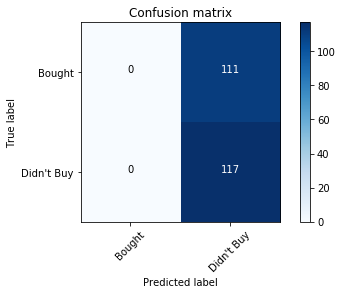

In [61]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
import itertools
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

# Feature Selection

In [62]:
# create polynomial and interaction terms

poly = PolynomialFeatures(degree=3, include_bias=False)
poly.fit(X)
column_names = poly.get_feature_names(X.columns)
df_poly= pd.DataFrame(poly.transform(X), columns=column_names)

X_train_base, X_test_base, y_train_base, y_test = train_test_split(df_poly, y, random_state=35,test_size=0.2)

print(poly.get_feature_names(X.columns))

['Impressions', 'Clicks', 'Spent', 'y', 'z', 'M', '7', '10', '15', '16', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '36', '63', '64', '65', '66', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '35-39', '40-44', '45-49', 'Amount_Purchased_1-5', 'Amount_Purchased_5-10', 'Amount_Purchased_10-20', 'Amount_Purchased_20-50', 'Amount_Purchased_50-100', 'Amount_Clicked_1-5', 'Amount_Clicked_5-10', 'Amount_Clicked_10-20', 'Amount_Clicked_20-50', 'Amount_Clicked_50-100', 'Impressions^2', 'Impressions Clicks', 'Impressions Spent', 'Impressions y', 'Impressions z', 'Impressions M', 'Impressions 7', 'Impressions 10', 'Impressions 15', 'Impressions 16', 'Impressions 18', 'Impressions 19', 'Impressions 20', 'Impressions 21', 'Impressions 22', 'Impressions 23', 'Impressions 24', 'Impressions 25', 'Impressions 26', 'Impressions 27', 'Impressions 28', 'Impressions 29', 'Impressions 30', 'Impressions 

In [63]:
print(X_train_base.shape, y_train_base.shape)
print(X_test_base.s hape, y_test.shape)

(910, 35989) (910,)
(228, 35989) (228,)


In [64]:
# scaling the data

scaler = StandardScaler()
scaler.fit(X_train_base)
X_train_base =pd.DataFrame(data=scaler.transform(X_train_base), columns=column_names)
X_test_base =pd.DataFrame(data=scaler.transform(X_test_base), columns=column_names)

In [65]:
# running log model with all ~36k features

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train_base, y_train_base)
y_pred_base_class = logreg.predict(X_test_base)

In [66]:
print('Test Accuracy score: ', metrics.accuracy_score(y_test, y_pred_base_class))
print('Test F1 score: ', metrics.f1_score(y_test, y_pred_base_class))

Test Accuracy score:  0.9780701754385965
Test F1 score:  0.9785407725321887


Confusion Matrix, without normalization
[[109   2]
 [  3 114]]


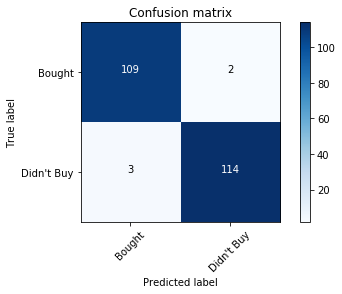

In [67]:
cm = confusion_matrix(y_test, y_pred_base_class)
classes = ['Bought', "Didn't Buy"]
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

In [68]:
dictionary = dict(zip(list(X_train_base.columns), list(logreg.coef_[0])))
dictionary

{'Impressions': 0.014994203925643454,
 'Clicks': 0.009990109486189634,
 'Spent': 0.00979391051341279,
 'y': -0.06346183336522657,
 'z': 0.017955645598074742,
 'M': -0.021467417212330787,
 '7': -0.02362459859930806,
 '10': 0.013842034600700723,
 '15': -0.014813112499762087,
 '16': 0.006481319689317256,
 '18': -0.018047050883482987,
 '19': -0.021129333166015254,
 '20': -0.013183625297352826,
 '21': -0.0033287137393991162,
 '22': -0.014102036193831132,
 '23': -0.017422624999873546,
 '24': -0.011896168072657193,
 '25': -0.015507455106843612,
 '26': -0.009835705015487447,
 '27': -0.024851557829283614,
 '28': -0.023649658812550545,
 '29': 0.011633105948284397,
 '30': -0.014493699327862755,
 '31': -0.0029732894818924713,
 '32': 0.012166514919717783,
 '36': -0.018922515638780966,
 '63': -0.019509091647869424,
 '64': -0.015360859940387132,
 '65': 0.01704705872677303,
 '66': -0.005151808866029651,
 '100': -0.005458036656206525,
 '101': 0.006054718784756839,
 '102': 0.0036460350128912156,
 '103':

In [74]:
35989 - sum(value == 0 for value in dictionary.values())

# most coefficients went to 0 except for 4,385 features

4385

In [69]:
log_coef01 = pd.DataFrame(data=logreg.coef_)
log_coef01.columns = X_train_base.columns
log_coef01 

Impressions   Clicks     Spent         y         z         M         7  \
0     0.014994  0.00999  0.009794 -0.063462  0.017956 -0.021467 -0.023625   

         10        15        16           ...             \
0  0.013842 -0.014813  0.006481           ...              

   Amount_Clicked_10-20^3  Amount_Clicked_10-20^2 Amount_Clicked_20-50  \
0                0.023075                                          0.0   

   Amount_Clicked_10-20^2 Amount_Clicked_50-100  \
0                                           0.0   

   Amount_Clicked_10-20 Amount_Clicked_20-50^2  \
0                                          0.0   

   Amount_Clicked_10-20 Amount_Clicked_20-50 Amount_Clicked_50-100  \
0                                                0.0                 

   Amount_Clicked_10-20 Amount_Clicked_50-100^2  Amount_Clicked_20-50^3  \
0                                           0.0                0.021648   

   Amount_Clicked_20-50^2 Amount_Clicked_50-100  \
0                                           0.0   

   Amount_Clicked_20-50 Amount_Clicked_50-100^2  Amount_Clicked_50-100^3  
0                                           0.0                      0.0  

[1 rows x 35989 columns]

In [750]:
log_coef01 = log_coef01.T.sort_values(by=0).T
log_coef01.plot(kind='bar', title='Modal Coefficients', legend=False, figsize=(16,8))

# couldnt load.....

KeyboardInterrupt: 

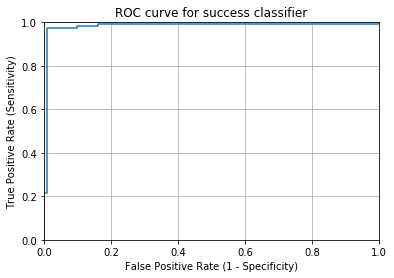

In [70]:
y_pred_base_prob = logreg.predict_proba(X_test_base)[:, 1]

# what does the ROC curve look like?
# first argument is true values, second argument is predicted probabilities
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_base_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for success classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()

In [ ]:
# log regression with polynomial and interactions gives accuracy and F1 of 0.98 and 0.98, very good

# KNN

In [75]:
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=35)

# scale the data
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  

# baseline KNN model
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred_class = knn.predict(X_test)
from sklearn import metrics
print('Accuracy:' + str(metrics.accuracy_score(y_test, y_pred_class)))
print('F1: ' + str(metrics.f1_score(y_test, y_pred_class)))

Accuracy:0.8491228070175438
F1: 0.8501742160278745


Confusion Matrix, without normalization
[[120  20]
 [ 23 122]]


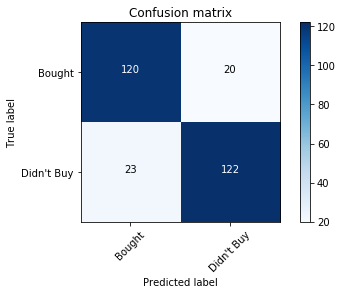

In [76]:
cm = confusion_matrix(y_test, y_pred_class)
classes = ['Bought', "Didn't Buy"]
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

In [78]:
# search for optimal value of k

k_range = list(range(1, 150))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_predict = knn.predict(X_test)
    score = metrics.f1_score(y_test, y_predict, average='weighted')
    k_scores.append( score)
print(k_scores)

[0.8491339526960985, 0.7925309416599, 0.8421052631578947, 0.800776735020048, 0.8524790837841625, 0.8016803796090723, 0.8315665061402645, 0.8271903476568828, 0.8069842796252029, 0.7752865784839523, 0.7709833934711423, 0.7710686252798897, 0.7773211157965136, 0.7748653245544893, 0.7733490052675112, 0.7643684210526317, 0.7554721513090104, 0.7467515408311208, 0.7419752611610396, 0.7429473684210527, 0.7532509984063649, 0.7409174469596, 0.7747903117446201, 0.7594993729987704, 0.7960496031952043, 0.795550827250988, 0.7718905122843305, 0.7634579799328199, 0.778849375652556, 0.7885008557768842, 0.7999113398761221, 0.7991700527362324, 0.8210658508721169, 0.8209071620410076, 0.8245614035087719, 0.8243798616478123, 0.835095842155599, 0.8419769076832421, 0.8666436713642783, 0.8630972325468204, 0.8631343073705984, 0.8666272655634358, 0.8736842105263158, 0.873690431140394, 0.8736281698033905, 0.8701850290640848, 0.887699933780445, 0.887719298245614, 0.887699933780445, 0.8912200317517734, 0.88769993378

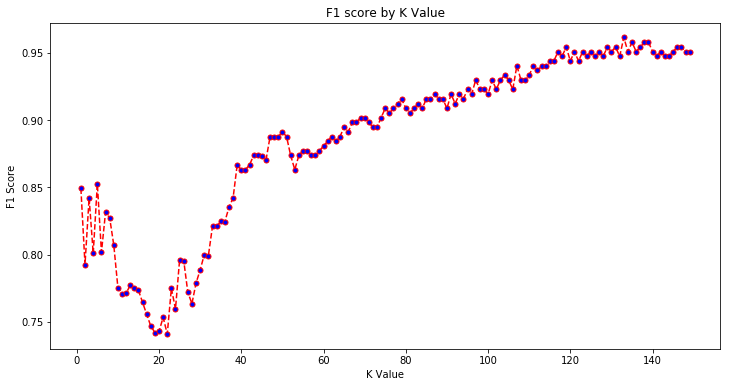

In [79]:
import matplotlib.pyplot as plt  

plt.figure(figsize=(12, 6))  
plt.plot(k_range, k_scores, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=5)
plt.title('F1 score by K Value')  
plt.xlabel('K Value')  
plt.ylabel('F1 Score') 
plt.show()

# optimal k appears at 131

In [80]:
# try different value for k
knn = KNeighborsClassifier(n_neighbors = 131)

# fit the model with data
knn.fit(X_train, y_train)

# make class predictions for the testing set
y_pred_class = knn.predict(X_test)

print('Accuracy:' + str(metrics.accuracy_score(y_test, y_pred_class)))
print('F1: ' + str(metrics.f1_score(y_test, y_pred_class)))

Accuracy:0.9543859649122807
F1: 0.9550173010380624


Confusion Matrix, without normalization
[[134   6]
 [  7 138]]


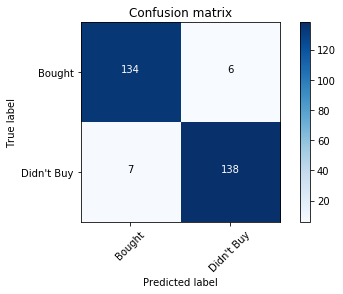

In [81]:
cm = confusion_matrix(y_test, y_pred_class)
classes = ['Bought', "Didn't Buy"]
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

In [600]:
# optimal accuracy at k=131, but still not as good as log

# Decision Tree

In [82]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error 

In [120]:
# baseline model

# Create matrix of features
X = df1.drop('success', axis = 1) 

# Create target variable
y = df1['success'] 

X.columns = X.columns.map(str)
feature_names = list(X.columns)
print(X.columns)

Index(['Impressions', 'Clicks', 'Spent', 'y', 'z', 'M', '7', '10', '15', '16',
       '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29',
       '30', '31', '32', '36', '63', '64', '65', '66', '100', '101', '102',
       '103', '104', '105', '106', '107', '108', '109', '110', '111', '112',
       '113', '114', '35-39', '40-44', '45-49', 'Amount_Purchased_1-5',
       'Amount_Purchased_5-10', 'Amount_Purchased_10-20',
       'Amount_Purchased_20-50', 'Amount_Purchased_50-100',
       'Amount_Clicked_1-5', 'Amount_Clicked_5-10', 'Amount_Clicked_10-20',
       'Amount_Clicked_20-50', 'Amount_Clicked_50-100'],
      dtype='object')


In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=35)

regressor = DecisionTreeRegressor()  
regressor.fit(X_train, y_train)  

y_pred = regressor.predict(X_test) 
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(y_pred)

Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0
[0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0.
 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0.
 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1.
 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1.
 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0.
 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1.
 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0.
 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1.
 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0.
 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 

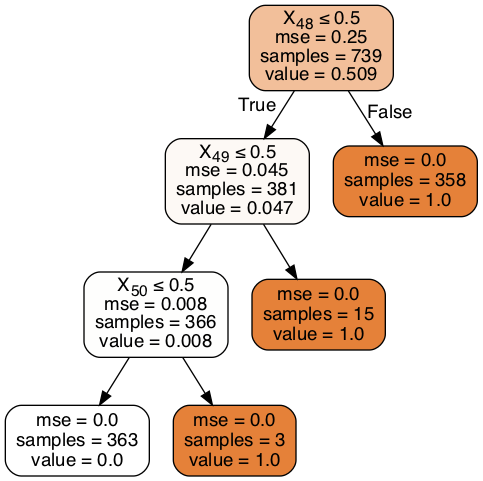

In [85]:
dot_data = StringIO()
export_graphviz(regressor, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tree_reg.png')
Image(graph.create_png())

In [86]:
X.columns = X.columns.map(str)
# using gridsearch to find best Decision Tree parameters
parameter_dict= {'max_depth': list(range(1,20,1)),  'max_leaf_nodes': list(range(2,20,1)), 'min_samples_split': list(range(2,20,1))}
#create our estimaor
reg_tree=DecisionTreeRegressor(random_state=35)

#create the instance of GridSearchCV
grid_tree = GridSearchCV(reg_tree, parameter_dict,  cv=10)

grid_tree.fit(X_train,y_train)

print(grid_tree.best_score_)
print(grid_tree.best_params_)
print(grid_tree.best_estimator_)

0.9945781232512947
{'max_depth': 2, 'max_leaf_nodes': 4, 'min_samples_split': 2}
DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=4, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=35, splitter='best')


In [ ]:
# DT is giving me an accuracy of 0.995 with best parameter of criterion='mse', max_depth=2, max_leaf_nodes=4, min_samples_leaf=1, min_samples_split=2

In [772]:
DecisionTreeRegressor()

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [781]:
regressor1 = DecisionTreeRegressor(max_depth= 2,  max_leaf_nodes= 4, min_samples_split= 2)  
regressor1.fit(X_train, y_train)  

y_pred = regressor1.predict(X_test) 
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(y_pred)


Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0
[0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0.
 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0.
 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1.
 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1.
 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0.
 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1.
 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.]


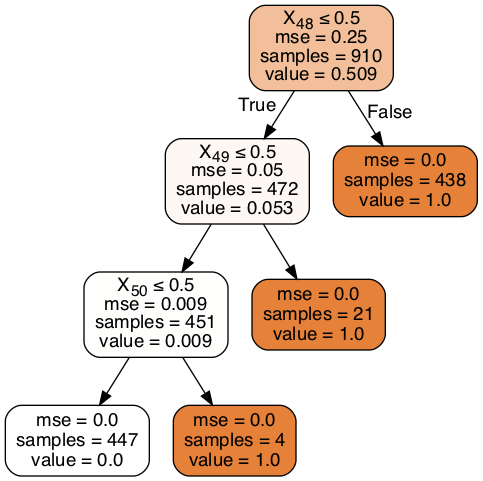

In [782]:
dot_data = StringIO()
export_graphviz(regressor1, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tree_reg.png')
Image(graph.create_png())

# Feature Importances

In [788]:
from sklearn.preprocessing import StandardScaler

X = df1.drop('success', axis = 1) 

y = df1['success'] 

X.columns = X.columns.map(str)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

sc=StandardScaler()
X_train_scaled= sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)
X.columns

Index(['Impressions', 'Clicks', 'Spent', 'y', 'z', 'M', '7', '10', '15', '16',
       '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29',
       '30', '31', '32', '36', '63', '64', '65', '66', '100', '101', '102',
       '103', '104', '105', '106', '107', '108', '109', '110', '111', '112',
       '113', '114', '35-39', '40-44', '45-49', 'Amount_Purchased_1-5',
       'Amount_Purchased_5-10', 'Amount_Purchased_10-20',
       'Amount_Purchased_20-50', 'Amount_Purchased_50-100',
       'Amount_Clicked_1-5', 'Amount_Clicked_5-10', 'Amount_Clicked_10-20',
       'Amount_Clicked_20-50', 'Amount_Clicked_50-100'],
      dtype='object')

In [784]:
# Create logistic regression
logistic = linear_model.LogisticRegression()

# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space, these are penalty sizes
C = C_param_range = [0.001,0.01,0.1, 0.5, 1, 2, 5, 10]

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

# Create grid search using 5-fold cross validation
clf_gs = GridSearchCV(logistic, hyperparameters, cv=5, scoring='f1') 

# Fit grid search
model = clf_gs.fit(X_train_scaled, y_train)

# View best hyperparameters
print('Best Penalty:', model.best_estimator_.get_params()['penalty'])
print('Best C:', model.best_estimator_.get_params()['C'])

Best Penalty: l1
Best C: 0.1


In [785]:
y_pred_train = model.best_estimator_.predict(X_train_scaled)

y_pred_test = model.best_estimator_.predict(X_test_scaled)

# Model Accuracy, how often is the classifier correct?
print("Training F1 Score:",metrics.f1_score(y_train, y_pred_train))
print("Testing F1 Score:",metrics.f1_score(y_test, y_pred_test))


Training F1 Score: 1.0
Testing F1 Score: 1.0


In [786]:
# Sort feature importances in descending order

model_params = list(zip(feature_cols, model.best_estimator_.coef_[0]))

model_params.sort(key = lambda x: abs(x[1]), reverse=True)

model_params

[('40-44', 4.188754559741652),
 ('45-49', 1.018220223017274),
 ('Impressions', 0.0),
 ('Clicks', 0.0),
 ('Spent', 0.0),
 ('Total_Conversion', 0.0),
 ('Approved_Conversion', 0.0),
 ('y', 0.0),
 ('z', 0.0),
 ('M', 0.0),
 (7, 0.0),
 (10, 0.0),
 (15, 0.0),
 (16, 0.0),
 (18, 0.0),
 (19, 0.0),
 (20, 0.0),
 (21, 0.0),
 (22, 0.0),
 (23, 0.0),
 (24, 0.0),
 (25, 0.0),
 (26, 0.0),
 (27, 0.0),
 (28, 0.0),
 (29, 0.0),
 (30, 0.0),
 (31, 0.0),
 (32, 0.0),
 (36, 0.0),
 (63, 0.0),
 (64, 0.0),
 (65, 0.0),
 (66, 0.0),
 (100, 0.0),
 (101, 0.0),
 (102, 0.0),
 (103, 0.0),
 (104, 0.0),
 (105, 0.0),
 (106, 0.0),
 (107, 0.0),
 (108, 0.0),
 (109, 0.0),
 (110, 0.0),
 (111, 0.0),
 (112, 0.0),
 (113, 0.0),
 (114, 0.0),
 ('35-39', 0.0)]

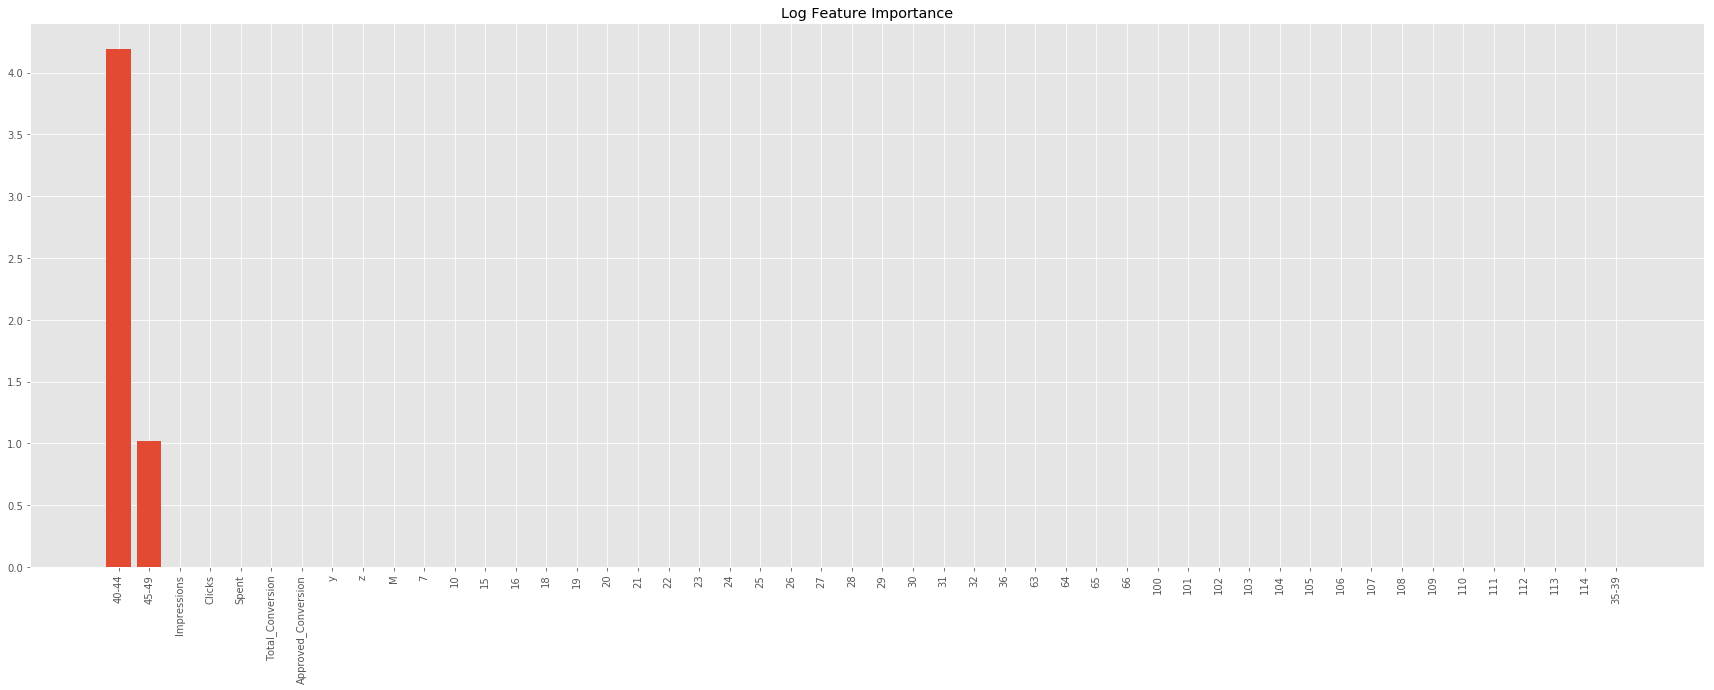

In [797]:
# Rearrange feature names so they match the sorted feature importances
model_features = [str(i[0]) for i in model_params]

feature_weights = [abs(i[1]) for i in model_params]

# Create plot
plt.figure(figsize=(30, 10))

# Create plot title
plt.title("Log Feature Importance")

# Add bars
plt.bar(model_features, feature_weights)

# Add feature names as x-axis labels
# plt.xticks(range(X.shape[1]), names, rotation=90)
plt.xticks(rotation=90)
# Show plot
plt.show()


In [806]:
from sklearn.tree import DecisionTreeClassifier
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#predict the training set
y_pred_train = clf.predict(X_train)

#Predict the response for test dataset
y_pred_test = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Training F1 Score:",metrics.f1_score(y_train, y_pred_train))
print("Testing F1 Score:",metrics.f1_score(y_test, y_pred_test))

Training F1 Score: 1.0
Testing F1 Score: 1.0


In [807]:
importances = clf.feature_importances_
print(importances)
print(feature_cols)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.8851797  0.08705247 0.02776783 0.         0.         0.
 0.         0.         0.         0.        ]
Index([        'Impressions',              'Clicks',               'Spent',
          'Total_Conversion', 'Approved_Conversion',                   'y',
                         'z',                   'M',                     7,
                          10,                    15,                    16,
                          18,                    19,                    20,
                          21,              

# Random Forest

In [100]:
from sklearn.ensemble import RandomForestClassifier

In [135]:

X = df1.drop('success', axis = 1) 

y = df1['success']
y.columns = ['Success']

X.columns = X.columns.map(str)
feature_names = list(X.columns)
target_names = y.columns
print(feature_names)
print(target_names)

['Impressions', 'Clicks', 'Spent', 'y', 'z', 'M', '7', '10', '15', '16', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '36', '63', '64', '65', '66', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '35-39', '40-44', '45-49', 'Amount_Purchased_1-5', 'Amount_Purchased_5-10', 'Amount_Purchased_10-20', 'Amount_Purchased_20-50', 'Amount_Purchased_50-100', 'Amount_Clicked_1-5', 'Amount_Clicked_5-10', 'Amount_Clicked_10-20', 'Amount_Clicked_20-50', 'Amount_Clicked_50-100']
['Success']


In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=35)

rfc = RandomForestClassifier(random_state = 35, n_estimators=200, max_depth=6, max_features= 0.5, min_samples_leaf= 0.03)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features=0.5, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=0.03, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=35, verbose=0, warm_start=False)

In [145]:
rfc_pred = rfc.predict(X_test)

# checking accuracy
print('Test Accuracy score: ', accuracy_score(y_test, rfc_pred))
# checking accuracy
print('Test F1 score: ', f1_score(y_test, rfc_pred))

Test Accuracy score:  0.9899749373433584
Test F1 score:  0.9902439024390244


In [139]:
estimator = rfc.estimators_[1]
export_graphviz(estimator, out_file='tree.dot',
                feature_names = feature_names,
                class_names = True,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

In [146]:
param_grid = { 
    'n_estimators': [100, 200,300,400],        # number of trees
    'max_features': [0.25, 0.33, 0.5],   # percentage of random features we include in each node
    'max_depth' : [5,6,7,8,9],
    'min_samples_leaf': [0.03,0.04,0.05,0.06]    # percentage of data to include as minimum
}

In [147]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5,n_jobs=-1) 

In [148]:
CV_rfc.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [149]:
rfc_pred = CV_rfc.best_estimator_.predict(X_test)

# checking accuracy
print('Test Accuracy score: ', accuracy_score(y_test, rfc_pred))

# checking accuracy
print('Test F1 score: ', f1_score(y_test, rfc_pred))

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'